# Assignment 1
Assignments are an individual assessment, you should not work in groups.

You will be turning in:

1. A README.md with all the relevant information. Please see example on Canvas under the Course Docs module.
2. An .ipynb with just your code (show all code necessary for the analysis, but remove superfluous code)
3. A PDF with your Report (see [Google Docs Template](https://docs.google.com/document/d/15O6AW5Ou4B4jpb2StytJAiEWIEOG_1B3GYJ5Xfne9mY/edit?usp=sharing))


# Business Churn
We're going to be using some [business churn data](https://raw.githubusercontent.com/katherinehansen2/CPSC392Hansen/main/data/streaming.csv) to help a streaming service predict whether customers will "churn" (a.k.a. stop being a customer). The variables include:

- `gender`: self-disclosed gender identity, `male`, `female`, `nonbinary` or `other`
- `age`: age in years
- `income`: self-reported annual income in thousands
- `monthssubbed`: months subscribed to the service.
- `plan`: the plan the user is currently subscribed to, `P` for premium, `A` for ad-free, `B` for basic (with ads)
- `meanhourswatched`: mean hours of content watched per month
- `competitorsub`: whether or not the customer is subscribed to your competitor's streaming service `0` for no, `1` for yes
- `topgenre`: most common genre of content the user watches, includes many categories.
- `secondgenre`: second most common genre of content the user watches, includes many categories.
- `numprofiles`: number of user profiles associated with the account.
- `cancelled`: whether or not the user has cancelled the servce in the past, `0` for no, `1` for yes
- `downgraded`: whether or not the user has downgraded the servce at some point in the past (Premium is the highest plan, then Ad Free, then Basic), `0` for no, `1` for yes
- `bundle`: whether or not the user purchased their plan as a "bundle" with another service, `0` for no, `1` for yes
- `kids`: whether or not the user has an active Kids profile on their account, `0` for no, `1` for yes
- `longestsession`: the length of the longest watch session from the user, in minutes
- `churn`: whether or not the customer has "churned" (i.e. left the service), `0` for no, `1` for yes

## 1. Modeling
- Check for missing values, drop if needed, and Reset Indices if needed.
- Using *Train-Test-Split Model Validation* with an 90/10 split and `sklearn`, build **two** models (**Logistic Regression**, and **Gradient Boosting Tree**) that predict `churn` using all the other variables.
- Z-score continuous/interval variables, and One Hot Encode/dummy categorical variables (when needed) before fitting your models.
- Once the models are trained, calculate the *Accuracy, Recall, Precision, and ROC AUC* for both the training and testing sets for both models.
- Assess the **calibration** for the **test set** of both models.
- Make note of which model you think performed the best (and why you think this)
- Use a plotnine/ggplot graph and your **test set with your best model's predictions** in your answer to the following question: How does a customer's `topgenre` impact whether they are predicted to churn? Use only the 5 most common genres in your test set. Discuss your findings in your report. How could you, the business owner, use this information to prevent customers from churning in the future?


# Mushroom Classification

We are going to use some [mushroom data](https://www.kaggle.com/datasets/uciml/mushroom-classification) from UCI to determine whether a mushroom is poisonous. The dataset contains many columns, the first a binary indicator (e - edible, p - poisonous) and the following categorical measures of the mushroom's appearance.


## 2. Modeling
- Check for missing values, drop if needed, and Reset Indices if needed.
- Using *Train-Test-Split Model Validation* with an 80/20 split and `sklearn`, build **three** models (**CategoricalNB**, **K-Nearest Neighbors**, and **LogisticRegression**) that predict `class` using all the other variables. For CategoricalNB, be sure to use only categorical/binary variables.
- Z-score continuous/interval variables, and One Hot Encode/dummy categorical variables before fitting your models.
- Once the models are trained, calculate the *Accuracy, Recall, Precision, and ROC AUC* for both the training and testing sets for all models.
- Make note of which model you think performed the best (and why you think this)
- We are then going to simulate building a poisonous mushroom detector app. Write a function that takes in a list of predictors, makes a prediction using one or more of your models, and then returns a message to the user about whether or not their mushroom is safe. Be sure to think carefully about which/how many models you use and justify your choice in your report. How confident are you that your user's mushroom is safe? Discuss in your report whether it would be appropriate to deploy this model in real life. Make at least 3 calls to this function and note the output in your report.


## 3. Report

[TEMPLATE HERE](https://docs.google.com/document/d/15O6AW5Ou4B4jpb2StytJAiEWIEOG_1B3GYJ5Xfne9mY/edit?usp=sharing)

Your Technical Report is a way to practice presenting and formatting your results like you would in industry. Make sure your report is clear, and explains things clearly. Your report should be thorough enough that someone could look at only your report and understand all of the modeling you've done. Write a report that has the following sections:

1. **Introduction**: description of the problem (e.g. what are you predicting? what variables do you have available? How might this model be useful if you are successful). You should end with a sentence or two about what the impact of these models could be.

2. **Methods**: describe your models in detail (as if explaining them to the CEO of the streaming service or a potential mushroom app customer), as well as any pre-processing you had to do to the data.

3. **Results**:

*For both streaming and mushroom:*

How well did your models perform according to the various metrics, were the models overfit (how can you tell)? What do those performance metrics (Acc, Precision, Recall, ROC AUC, Calibration...) tell you about the model? How much do you trust the results of your models?

*Streaming:*

**Which one model would you choose to put "in production"? What are the pros and cons of each model (think about model performance, time/space complexity, interpretability...etc)**. Is the model well calibrated? Does that matter? How would you suggest the CEO use the classification model you chose? How would you suggest the CEO strategically use the movie suggestions you generated (**include screenshot of movie suggestions generated by the app using your file**)?

*Mushroom:*

Discuss thoroughly whether or not your function is "safe" to use. How confident are you in your model's outputs? What would make you more confident in them? Discuss the ethical implications of putting this algorithm into production.

4. **Discussion/Reflection**: A few sentences about what you learned from performing these analyses, and at least one suggestion for what you'd add or do differently if you were to perform this analysis again in the future.

In [1]:
import warnings
warnings.filterwarnings('ignore')

#data imports
import pandas as pd
import numpy as np
from plotnine import *

#modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.naive_bayes import CategoricalNB

from sklearn.cluster import DBSCAN, KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score, accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

from PIL import Image

%matplotlib inline

**STREAMING**

In [2]:
#load in business churn dataset

streaming = pd.read_csv('https://raw.githubusercontent.com/katherinehansen2/CPSC392Hansen/main/data/streaming.csv')
streaming.head()

#check for null values

streaming.isnull().sum()

#drop missing values and reset index?? if null values present

streaming.dropna(inplace=True)
streaming.reset_index(drop=True, inplace=True)
streaming.isnull().sum()
streaming.head()

#one hot encode categorical variables

pd.get_dummies(streaming, columns=['gender', 'plan', 'topgenre', 'secondgenre'])

#list of predictors, x and y values

predictors = ["age", "income", "monthssubbed", "meanhourswatched", "competitorsub", "numprofiles", "cancelled", "downgraded", "bundle", "kids", "longestsession", "gender", "plan", "topgenre", "secondgenre"]
x = streaming[predictors]
y = streaming["churn"]


In [3]:
#train test split -> 90% train, 10% test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

#continuous variables

contin = ["age", "income", "monthssubbed", "meanhourswatched", "numprofiles", "longestsession"]

#z score continuous variables

scaler = StandardScaler()
x_train[contin] = scaler.fit_transform(x_train[contin])
x_test[contin] = scaler.transform(x_test[contin])
x_train.head()

,age,income,monthssubbed,meanhourswatched,competitorsub,numprofiles,cancelled,downgraded,bundle,kids,longestsession,gender,plan,topgenre,secondgenre
49072,-1.671365,-1.659651,-0.273417,-0.619346,0,-0.429234,1.0,1,1,1,-0.289438,woman,B,ScienceFiction,Thriller
30732,-1.475278,2.566429,1.864818,-0.310481,1,0.759151,0.0,0,1,1,-0.211775,man,P,Thriller,RomanticComedy
65843,1.400660,-0.274823,-0.006137,-0.598038,1,0.164958,0.0,0,1,1,2.144917,woman,B,ScienceFiction,Thriller
19861,-0.102671,0.899862,1.397079,-0.110135,1,0.759151,0.0,0,0,0,2.074537,woman,A,Horror,Comedy
58621,1.662109,-0.078600,-0.807976,0.822833,1,-0.429234,1.0,0,0,1,-0.467004,woman,B,Action,RomanticComedy


Train Accuracy:  0.7275878459059345
Train Recall:  0.17883743523316062
Train Precision:  0.5790301441677589
Train ROC AUC:  0.6942804984684492

Test Accuracy:  0.725717266562337
Test Recall:  0.17882947976878613
Test Precision:  0.581668625146886
Test ROC AUC:  0.6944069293783562


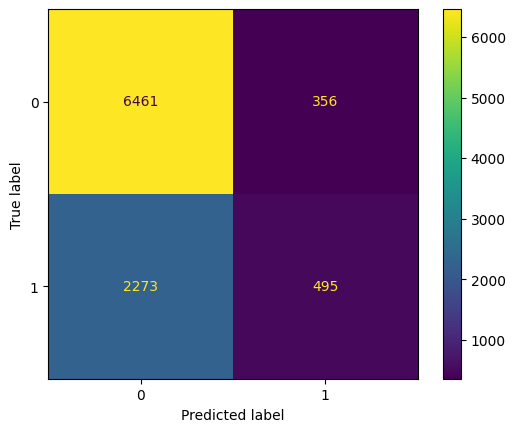

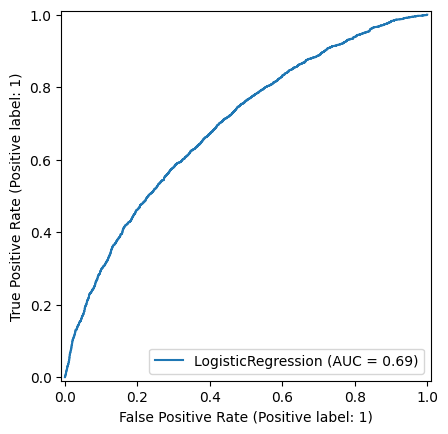

In [4]:
#LOGISTIC REGRESSION

lr = LogisticRegression(random_state=1)
lr.fit(x_train[contin], y_train)

#predict

y_train_pred = lr.predict(x_train[contin])
y_test_pred = lr.predict(x_test[contin])

y_train_pred_prob = lr.predict_proba(x_train[contin])[:,1]
y_test_pred_prob = lr.predict_proba(x_test[contin])[:,1]

#Accuracy, Recall, Precision, and ROC AUC
#train
print("Train Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Train Recall: ", recall_score(y_train, y_train_pred))
print("Train Precision: ", precision_score(y_train, y_train_pred))
print("Train ROC AUC: ", roc_auc_score(y_train, y_train_pred_prob))
print()

#test
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Test Recall: ", recall_score(y_test, y_test_pred))
print("Test Precision: ", precision_score(y_test, y_test_pred))
print("Test ROC AUC: ", roc_auc_score(y_test, y_test_pred_prob))

#calibration of test set

print(ConfusionMatrixDisplay.from_estimator(lr, x_test[contin], y_test))
RocCurveDisplay.from_estimator(lr, x_test[contin], y_test)


Train Accuracy:  0.729523875769485
Train Recall:  0.17531573834196892
Train Precision:  0.5941830155028125
Train ROC AUC:  0.6998139738783041

Test Accuracy:  0.7279081898800208
Test Recall:  0.17377167630057805
Test Precision:  0.5997506234413965
Test ROC AUC:  0.692643153040554


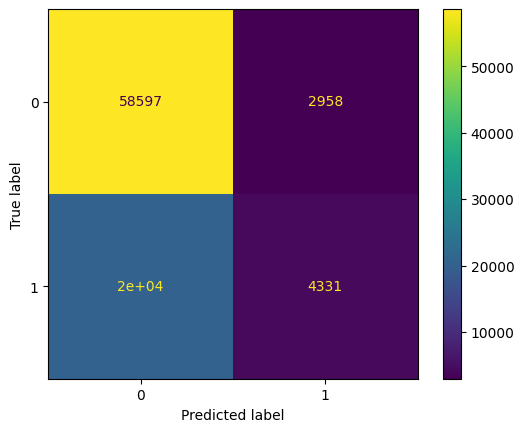

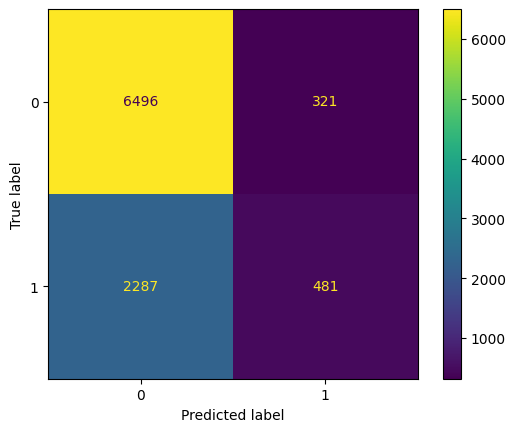

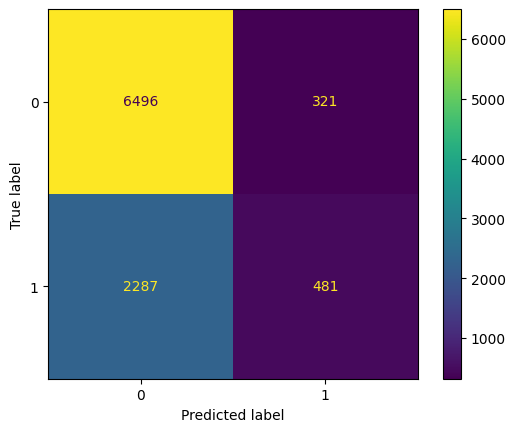

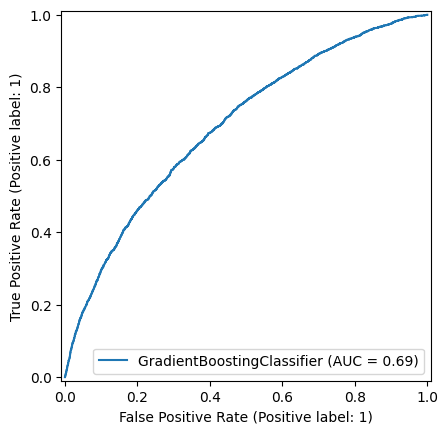

In [5]:
#GRADIENT BOOSTING TREE

tree = GradientBoostingClassifier()
tree.fit(x_train[contin], y_train)

#predict
print(ConfusionMatrixDisplay.from_estimator(tree, x_train[contin], y_train))
print(ConfusionMatrixDisplay.from_estimator(tree, x_test[contin], y_test))

y_train_pred = tree.predict(x_train[contin])
y_test_pred = tree.predict(x_test[contin])

y_train_pred_prob = tree.predict_proba(x_train[contin])[:,1]
y_test_pred_prob = tree.predict_proba(x_test[contin])[:,1]

#Accuracy, Recall, Precision, and ROC AUC
#train
print("Train Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Train Recall: ", recall_score(y_train, y_train_pred))
print("Train Precision: ", precision_score(y_train, y_train_pred))
print("Train ROC AUC: ", roc_auc_score(y_train, y_train_pred_prob))
print()

#test
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Test Recall: ", recall_score(y_test, y_test_pred))
print("Test Precision: ", precision_score(y_test, y_test_pred))
print("Test ROC AUC: ", roc_auc_score(y_test, y_test_pred_prob))

#calibration of test set

print(ConfusionMatrixDisplay.from_estimator(tree, x_test[contin], y_test))
RocCurveDisplay.from_estimator(tree, x_test[contin], y_test)

Model 2 - Gradient Boosting Trees is slightly better due to its higher accuracy and better precision. It is better at predicting true positives without too many false positives.

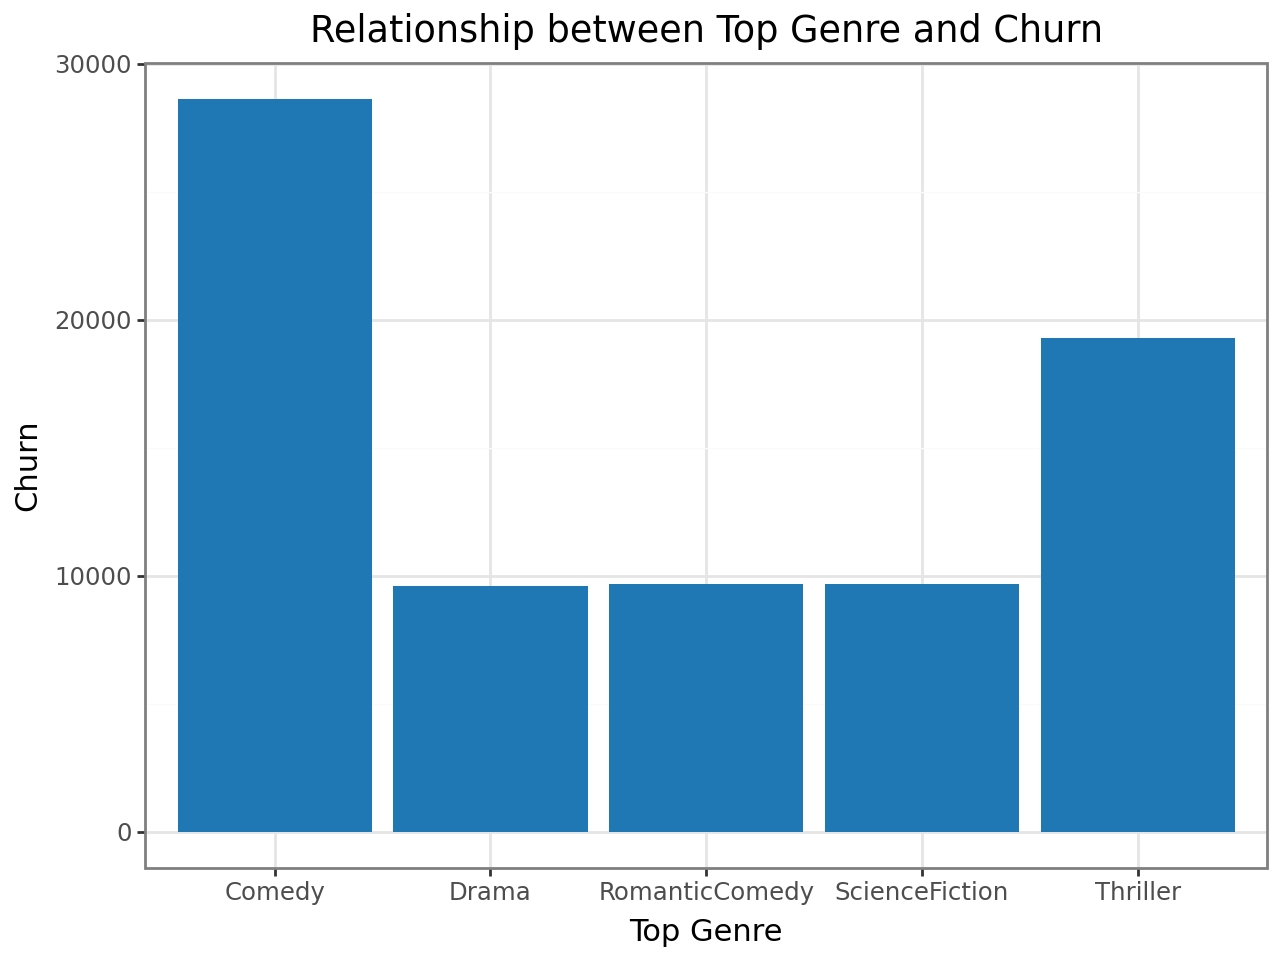

In [6]:
#ggplot with test set of best model - gbt

(ggplot(streaming, aes(x = "topgenre", fill = "churn"))
 + geom_bar(position = "dodge", fill = "#1f77b4")
 + theme_bw()
 + labs(
     title = "Relationship between Top Genre and Churn",
     x = "Top Genre",
     y = "Churn")
 )

#topgenre vs churn using top 5 genres

top_genres = streaming["topgenre"].value_counts().head(5).index
streaming_top = streaming[streaming["topgenre"].isin(top_genres)]
(ggplot(streaming_top, aes(x = "topgenre", fill = "churn"))
 + geom_bar(position = "dodge", fill = "#1f77b4")
 + theme_bw()
 + labs(
     title = "Relationship between Top Genre and Churn",
     x = "Top Genre",
     y = "Churn")
 )

**MUSHROOM**

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
#load in mushroom dataset

mushroom = pd.read_csv('mushrooms.csv')
mushroom.head()

#check for null values

mushroom.isnull().sum()

#no missing values

#one hot encode categorical variables

mushroom = pd.get_dummies(mushroom, columns=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'], drop_first = True)
mushroom.head()

#list of predictors, x and y values

predictors = mushroom.columns.tolist()
predictors.remove('class_p')
x = mushroom[predictors]
y = mushroom["class_p"]

In [11]:
#train test split -> 80% train, 20% test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

#no continuous variables to z score

In [12]:
#CATEGORICAL NB

nb = CategoricalNB()
nb.fit(x_train, y_train)

#predict

y_train_pred = nb.predict(x_train)
y_test_pred = nb.predict(x_test)

#Accuracy, Recall, Precision, and ROC AUC
#train
print("Train Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Train Recall: ", recall_score(y_train, y_train_pred))
print("Train Precision: ", precision_score(y_train, y_train_pred))
print("Train ROC AUC: ", roc_auc_score(y_train, y_train_pred))
print()

#test
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Test Recall: ", recall_score(y_test, y_test_pred))
print("Test Precision: ", precision_score(y_test, y_test_pred))
print("Test ROC AUC: ", roc_auc_score(y_test, y_test_pred))

Train Accuracy:  0.9401446376365594
Train Recall:  0.8852459016393442
Train Precision:  0.9885139985642498
Train ROC AUC:  0.9379004006425766

Test Accuracy:  0.9378461538461539
Test Recall:  0.8807453416149068
Test Precision:  0.9929971988795518
Test ROC AUC:  0.9373238903196485


In [13]:
#K-NEAREST NEIGHBORS

knn = KNeighborsClassifier()
hparams = {"n_neighbors": [1,3,5,7,9]}

grid = GridSearchCV(knn, hparams, cv=5)
grid.fit(x_train, y_train)

print("GridSearchCV chose: ", grid.best_estimator_.get_params()["n_neighbors"])

#predict

y_train_pred = grid.predict(x_train)
y_test_pred = grid.predict(x_test)

y_train_pred_prob = grid.predict_proba(x_train)[:,1]
y_test_pred_prob = grid.predict_proba(x_test)[:,1]

#Accuracy, Recall, Precision, and ROC AUC
#train
print("Train Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Train Recall: ", recall_score(y_train, y_train_pred))
print("Train Precision: ", precision_score(y_train, y_train_pred))
print("Train ROC AUC: ", roc_auc_score(y_train, y_train_pred_prob))
print()

#test
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Test Recall: ", recall_score(y_test, y_test_pred))
print("Test Precision: ", precision_score(y_test, y_test_pred))
print("Test ROC AUC: ", roc_auc_score(y_test, y_test_pred_prob))

GridSearchCV chose:  1
Train Accuracy:  1.0
Train Recall:  1.0
Train Precision:  1.0
Train ROC AUC:  1.0

Test Accuracy:  1.0
Test Recall:  1.0
Test Precision:  1.0
Test ROC AUC:  1.0


In [14]:
#LOGISTIC REGRESSION

lr = LogisticRegression(random_state=1)
lr.fit(x_train, y_train)

#predict

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

#Accuracy, Recall, Precision, and ROC AUC
#train

print("Train Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Train Recall: ", recall_score(y_train, y_train_pred))
print("Train Precision: ", precision_score(y_train, y_train_pred))
print("Train ROC AUC: ", roc_auc_score(y_train, y_train_pred))
print()
#test
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Test Recall: ", recall_score(y_test, y_test_pred))
print("Test Precision: ", precision_score(y_test, y_test_pred))
print("Test ROC AUC: ", roc_auc_score(y_test, y_test_pred))

Train Accuracy:  0.9995383905216187
Train Recall:  0.9990356798457087
Train Precision:  1.0
Train ROC AUC:  0.9995178399228544

Test Accuracy:  0.9969230769230769
Test Recall:  0.9937888198757764
Test Precision:  1.0
Test ROC AUC:  0.9968944099378882


The Logistic Regression model performed the best. While the K Nearest neighbors model had perfect metrics, this implies that it is overfitting the data and will not be able to accurately generalize new data. However, the Logistic Regression model had very high performance on all metrics without showing the signs of overfitting that the KNN model did.

In [15]:
#function to predict if mushroom is safe using list of predictors

def mushroom_safe(predictors, model):
  feature_names = mushroom.columns
  predictor_dict = dict(zip(feature_names, predictors))
  df = pd.DataFrame([predictor_dict])   # Create a DataFrame for the single prediction
  df = pd.get_dummies(df).reindex(columns=model.feature_names_in_, fill_value=0)   # Ensure columns match the training data by reindexing
  prediction = model.predict(df)[0]
  if prediction == 0:
      return "The mushroom is safe."
  else:
      return "The mushroom is not safe."

#call 1 - safe mushroom

features1 = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
mushroom_safe(features1, lr)

#call 2 - poisonous mushroom

features2 = [0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]
mushroom_safe(features2, lr)

#call 3 - unique values

features3 = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
mushroom_safe(features3, lr)

'The mushroom is not safe.'